# Tesla Stock Price Forecasting with LSTM

## Overview
This notebook focuses on building a time series forecasting model to predict Tesla’s future stock prices. Leveraging a **Long Short-Term Memory (LSTM)** neural network, we aim to capture long-term dependencies and complex patterns in Tesla’s stock price movements, enabling reliable forecasts for future prices.

## Task Outline
1. **Data Preparation**:
   - Load historical Tesla stock price data and scale it for LSTM stability.
   - Transform the dataset into supervised learning sequences and split it into training (80%) and testing (20%) sets for model evaluation.

2. **Model Selection**:
   - Configure and train the LSTM model on the training dataset with two LSTM layers followed by a dense output layer.
   - Use **early stopping** to avoid overfitting by monitoring validation loss during training.

3. **Forecasting & Evaluation**:
   - Generate stock price forecasts on the test set and rescale predictions back to the original scale.
   - Evaluate the model using **Mean Absolute Error (MAE)**, **Root Mean Squared Error (RMSE)**, and **Mean Absolute Percentage Error (MAPE)** to assess prediction accuracy.

4. **Visualization**:
   - Plot actual vs. forecasted prices on the test set, allowing for visual analysis of the LSTM’s predictive performance.

5. **Model Saving**:
   - Save the trained LSTM model as an `.h5` file in the `../models/` directory for future prediction and forecasting tasks.

This notebook delivers a comprehensive workflow from data preparation through model training and evaluation, providing a robust LSTM-based approach for predicting Tesla stock price trends and dynamics.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.1 MB/s eta 0:00:00


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.2289 - val_loss: 0.0386
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0166 - val_loss: 0.0229
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0103 - val_loss: 0.0175
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0097 - val_loss: 0.0178
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0085 - val_loss: 0.0174
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0074 - val_loss: 0.0131
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0068 - val_loss: 0.0124
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0067 - val_loss: 0.0115
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - val_loss: 0.0138
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0057 - val_loss: 0.0101
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0051 - val_loss: 0.0109
Epoch 12/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 - va

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Mean Absolute Error (MAE): 5.725325063881556
Root Mean Squared Error (RMSE): 7.842800391956031
Mean Absolute Percentage Error (MAPE): 0.026441031153336545


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


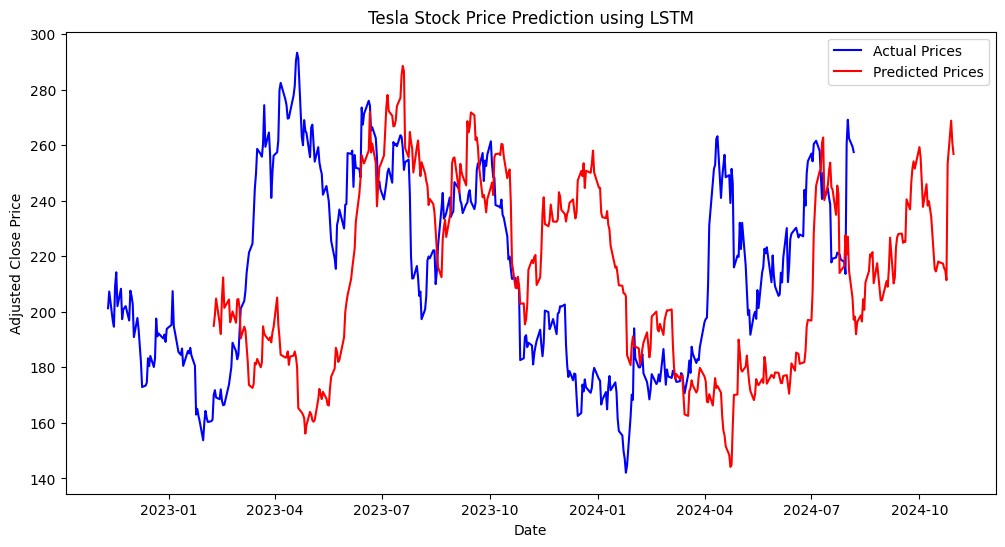

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

# Load and prepare the dataset
df = pd.read_csv('/content/drive/MyDrive/data/TSLA_historical_data.csv', parse_dates=['Date'], index_col='Date')
y = df['Adj Close']

# Scaling the data for better prediction stability
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Convert time series data to supervised learning format for LSTM
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length and split the data into training and testing sets (80% training, 20% testing)
sequence_length = 60
train_data = y_scaled[:int(0.8 * len(y_scaled))]
test_data = y_scaled[int(0.8 * len(y_scaled)):]

# Create sequences
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

# Save the model for future use
model_path = "/content/drive/MyDrive/data/lstm_model.h5"
model.save(model_path)

# Make predictions on the test set
predictions = model.predict(X_test)

# Rescale predictions and test data back to original scale
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

# Evaluate the model
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
rmse = mean_squared_error(y_test_rescaled, predictions_rescaled, squared=False)
mape = mean_absolute_percentage_error(y_test_rescaled, predictions_rescaled)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# Plot actual vs predicted for visual evaluation
plt.figure(figsize=(12, 6))
# The x-axis for the actual data needs to be adjusted
# to match the number of data points in y_test_rescaled.
# We slice the date index using the length of y_test_rescaled
# and offset it by the starting point of the test data.
plt.plot(y.index[int(0.8 * len(y)):int(0.8 * len(y)) + len(y_test_rescaled)],
         y_test_rescaled, label='Actual Prices', color='blue')

plt.plot(y.index[int(0.8 * len(y)) + sequence_length:],
         predictions_rescaled, label='Predicted Prices', color='red')

plt.title('Tesla Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()